<a href="https://colab.research.google.com/github/swampxx/sciann-examples/blob/main/sciann_burgers_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install sciann
%%capture sciann_installation
!pip install sciann

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sciann as sn

%matplotlib inline

---------------------- SCIANN 0.6.3.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 


We reproduce the Burgers Equation example which is illustraded in the SciANN paper.

Burgers Equation:

$u_{,t} + u u_{,x} - (0.01/\pi)u_{,xx} = 0, t \in [0,1], x \in [-1,1]$

initial and boundary conditions $u(t=0, x)=-\sin (\pi x)$ and $u(t, x= \pm 1) = 0$, respectively. 

In [ ]:
# In this cell, we define the input variables (x, t)
# and the solution variable u

x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [t, x], 8*[20], 'tanh')

In [ ]:
# the governing equation
L1 = sn.diff(u, t) + u * sn.diff(u, x) - (0.01 / np.pi) * sn.diff(u, x, order=2)

# initial and boundary conditions should be defined as continuous fucntions
TOL = 0.001  # tolerance value

# note that C1 is zero at all sampling points except t < 0
# if the result of the solution variable u is not zero,
# we penalize it with the loss term

C1 = (1-sn.sign(t - TOL)) * (u + sn.sin(np.pi*x))
C2 = (1-sn.sign(x - (-1+TOL))) * (u)
C3 = (1+sn.sign(x - ( 1-TOL))) * (u)

In [ ]:
# define SciANN model
m = sn.SciModel([x, t], [L1, C1, C2, C3])

In [ ]:
# generate input data
x_data, t_data = np.meshgrid(
    np.linspace(-1, 1, 100), 
    np.linspace(0, 1, 100)
)

In [ ]:
# training...
h = m.train([x_data, t_data], 4*['zero'], batch_size=256, epochs=10000, verbose=2)

In [ ]:
# test data
x_test, t_test = np.meshgrid(
    np.linspace(-1, 1, 200), 
    np.linspace(0, 1, 200)
)

# generate predictions for the test data
u_pred = u.eval(m, [x_test, t_test])

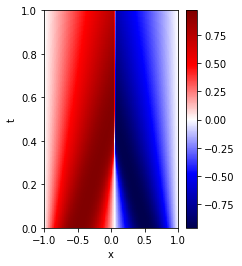

In [ ]:
# visualization

fig = plt.figure(figsize=(3, 4))
plt.pcolor(x_test, t_test, u_pred, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()